In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


import numpy as np



from google.colab import drive
drive.mount('/content/drive')
import cv2
from google.colab.patches import cv2_imshow


Mounted at /content/drive


#**Rede Convolucional**



---


As Redes Neurais Convolucionais (CNN) são um tipo especial de Rede Neural Artificial.as CNN vêm sendo aplicadas, principalmente, no processamento e análise inteligente de imagens digitais.

Diferente de outras redes neurais, na rede neural convolucional, as imagens de teste são submetidas a um processo de convolução. Uma convolução é a aplicação simples de um filtro a uma entrada que resulta em uma ativação. a repitida aplicação de filtros é responsável por extrair, bem como mapear o conteúdo da imagem, transformando-o em dados.

Para o problema em questão utilizaresmos um modelo de rede neural convolucional para prever as classes de imagens, sendo elas pandas, gatos e cachorros.

---
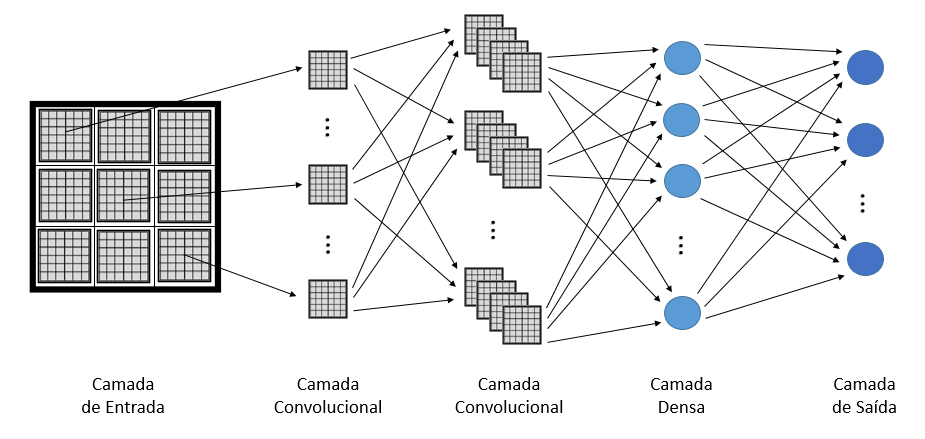


---



Found 2090 images belonging to 3 classes.
Found 900 images belonging to 3 classes.
[0. 0. 1.]


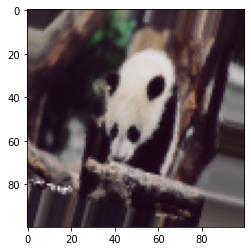

In [5]:
#importação,separação e visualização do Dataset


train_datagen = ImageDataGenerator(                             #função para a data augmentation 
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


valid_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(                
    directory=r"/content/drive/My Drive/CIS/Trainee/part5/animals/train",
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=38,
    class_mode="categorical",
    shuffle=True,
    seed=42
)


valid_generator = valid_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/CIS/Trainee/part5/animals/valid",
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=38,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

img,label= next(train_generator)    


print(label[1])

plt.imshow(img[1])


In [ ]:
#construção da rede convolucional


rede=keras.models.Sequential()
rede.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))       #aplicação de filtros
rede.add(layers.MaxPool2D((2,2)))                                                 # camada de pooling para simplificar a informação
rede.add(layers.Conv2D(64,(3,3),activation='relu'))                                
rede.add(layers.MaxPool2D((2,2)))
rede.add(layers.Conv2D(128,(3,3),activation='relu'))
rede.add(layers.MaxPool2D((2,2)))


rede.add(layers.Flatten())                                                        #camada de entrada com a achatamento da informação em 1 dimensão
rede.add(layers.Dense(512,activation='relu'))                                     
rede.add(layers.Dense(3,activation='softmax'))                                    #camada de saída com 3 neuronios para a previsão das classes 



optim=keras.optimizers.Adam(learning_rate=0.001)
metrics=["accuracy"]

rede.compile(optimizer=optim,loss='categorical_crossentropy',metrics=metrics)

rede.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [ ]:
#treinamento da rede

rede.fit(train_generator,validation_data=valid_generator,epochs=15,verbose=2)

Epoch 1/15
55/55 - 362s - loss: 0.9782 - accuracy: 0.5115 - val_loss: 0.9047 - val_accuracy: 0.5856 - 362s/epoch - 7s/step
Epoch 2/15
55/55 - 54s - loss: 0.8169 - accuracy: 0.5751 - val_loss: 0.7800 - val_accuracy: 0.6222 - 54s/epoch - 982ms/step
Epoch 3/15
55/55 - 54s - loss: 0.7444 - accuracy: 0.6196 - val_loss: 0.6825 - val_accuracy: 0.6711 - 54s/epoch - 983ms/step
Epoch 4/15
55/55 - 54s - loss: 0.7092 - accuracy: 0.6478 - val_loss: 0.7703 - val_accuracy: 0.6533 - 54s/epoch - 986ms/step
Epoch 5/15
55/55 - 55s - loss: 0.6801 - accuracy: 0.6488 - val_loss: 0.8163 - val_accuracy: 0.6356 - 55s/epoch - 991ms/step
Epoch 6/15
55/55 - 54s - loss: 0.6675 - accuracy: 0.6780 - val_loss: 0.6692 - val_accuracy: 0.6522 - 54s/epoch - 979ms/step
Epoch 7/15
55/55 - 54s - loss: 0.6302 - accuracy: 0.6971 - val_loss: 0.5588 - val_accuracy: 0.7400 - 54s/epoch - 984ms/step
Epoch 8/15
55/55 - 54s - loss: 0.6168 - accuracy: 0.7014 - val_loss: 0.5910 - val_accuracy: 0.7311 - 54s/epoch - 982ms/step
Epoch 9/1

Podemos ver que pela simplicidade do modelo a accuracia do modelo tende a se estabilizar em 0,7 enquanto o loss tende a se estabilizar em 0,56, porém para o modelo montado esses são dados que condizem com o esperado, mostrando o poder de previsão se uma simples rede neural convolucional.